In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

C:\Users\sjsim\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### 1. 문제 정의 
- wine 등급 분류

#### 2. 데이터 수집 

In [2]:
data=pd.read_csv("winequality-red.csv")

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 3. EDA 

In [7]:
data.shape

(1599, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


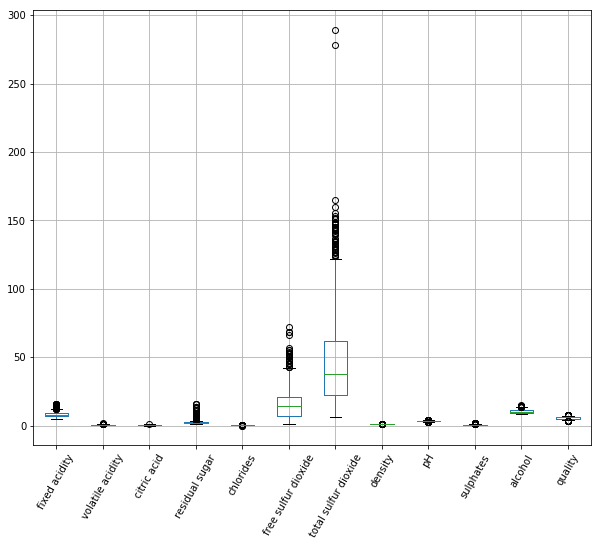

In [9]:
data.boxplot(figsize=(10,8))
plt.xticks(rotation=60)
plt.show()

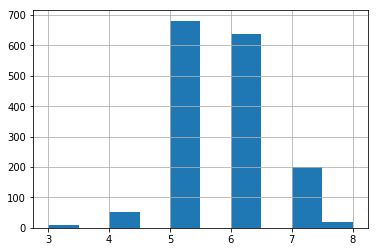

In [10]:
data['quality'].hist()
plt.show()

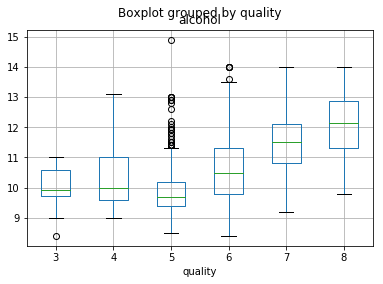

In [11]:
data.boxplot(column=['alcohol'],by='quality')
plt.show()

#### 4. preprocessing

In [12]:
X=data.iloc[: , :-1]
y=data.iloc[:, -1]
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, stratify=y)

In [14]:
y_train.value_counts()

5    477
6    446
7    139
4     37
8     13
3      7
Name: quality, dtype: int64

#### 5. 학습하기

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_model=KNeighborsClassifier()

In [17]:
knn_result=cross_val_score(knn_model, X_train,y_train, cv=5)

In [18]:
print(knn_result.mean())

0.5120932252284244


In [20]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
print(knn_model.score(X_test,y_test))

0.49375
